In [4]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 1

%aimport b6_epilepsies 
import b6_epilepsies as b6 #.py file in the same dir as this .ipynb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# from scipy.stats import mannwhitneyu

# Define the custom color palette and genotype order
new_colors_order = sns.color_palette(palette='Set2', n_colors=3)
new_colors_order[0], new_colors_order[1], new_colors_order[2] = new_colors_order[1], new_colors_order[0], new_colors_order[2]
color_map = dict(zip(['wt', 'het', 'hom'], new_colors_order))

#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "250121"
box1   = "14"
box2   = "15"
exp    = "PLPBP"
export = False
    
pnpo_ptz_obj_raw = b6.RawData(date, box1, box2, exp, export) #.prepped_data attribute to access df



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Start of experiment: 2025-01-21 14:28:39
Preparing 250121_14_15_PLPBP/250121_14_15_PLPBP_raw_df.csv.


/Users/jadelau/Development/Neuroscience/B6 Epilepsies/b6_epilepsies.py:62: UserWarning: Parsing dates in %Y/%m/%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  temp_df['stdate_sttime'] = pd.to_datetime(temp_df['stdate'] + ' ' + temp_df['sttime'], dayfirst=True)


Done


In [5]:
pnpo_ptz_obj_raw.df


,fullts,zhrs,exsecs,abstime,time,type,location,data1,plate,well,box,genotype
0,2025-01-21 14:28:39.040179,5.477511,0.040179,1970-01-08 21:42:27.112,40179,101.0,C097,12.0,2,A1,15,het
1,2025-01-21 14:28:39.040179,5.477511,0.040179,1970-01-08 21:42:27.112,40179,101.0,C098,0.0,2,A2,15,hom
2,2025-01-21 14:28:39.040179,5.477511,0.040179,1970-01-08 21:42:27.112,40179,101.0,C099,0.0,2,A3,15,het
3,2025-01-21 14:28:39.040179,5.477511,0.040179,1970-01-08 21:42:27.112,40179,101.0,C100,0.0,2,A4,15,het
4,2025-01-21 14:28:39.040179,5.477511,0.040179,1970-01-08 21:42:27.112,40179,101.0,C101,0.0,2,A5,15,wt
...,...,...,...,...,...,...,...,...,...,...,...,...
6155023,2025-01-21 14:50:02.155514,5.833932,1283.155514,1970-01-23 18:17:43.848,1283155514,101.0,C080,0.0,1,G8,14,het
6155024,2025-01-21 14:50:02.155514,5.833932,1283.155514,1970-01-23 18:17:43.848,1283155514,101.0,C081,0.0,1,G9,14,hom
6155025,2025-01-21 14:50:02.155514,5.833932,1283.155514,1970-01-23 18:17:43.848,1283155514,101.0,C082,0.0,1,G10,14,hom
6155026,2025-01-21 14:50:02.155514,5.833932,1283.155514,1970-01-23 18:17:43.848,1283155514,101.0,C083,0.0,1,G11,14,het


/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_5799/2196345292.py:39: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_5799/2196345292.py:56: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_5799/2196345292.py:73: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(


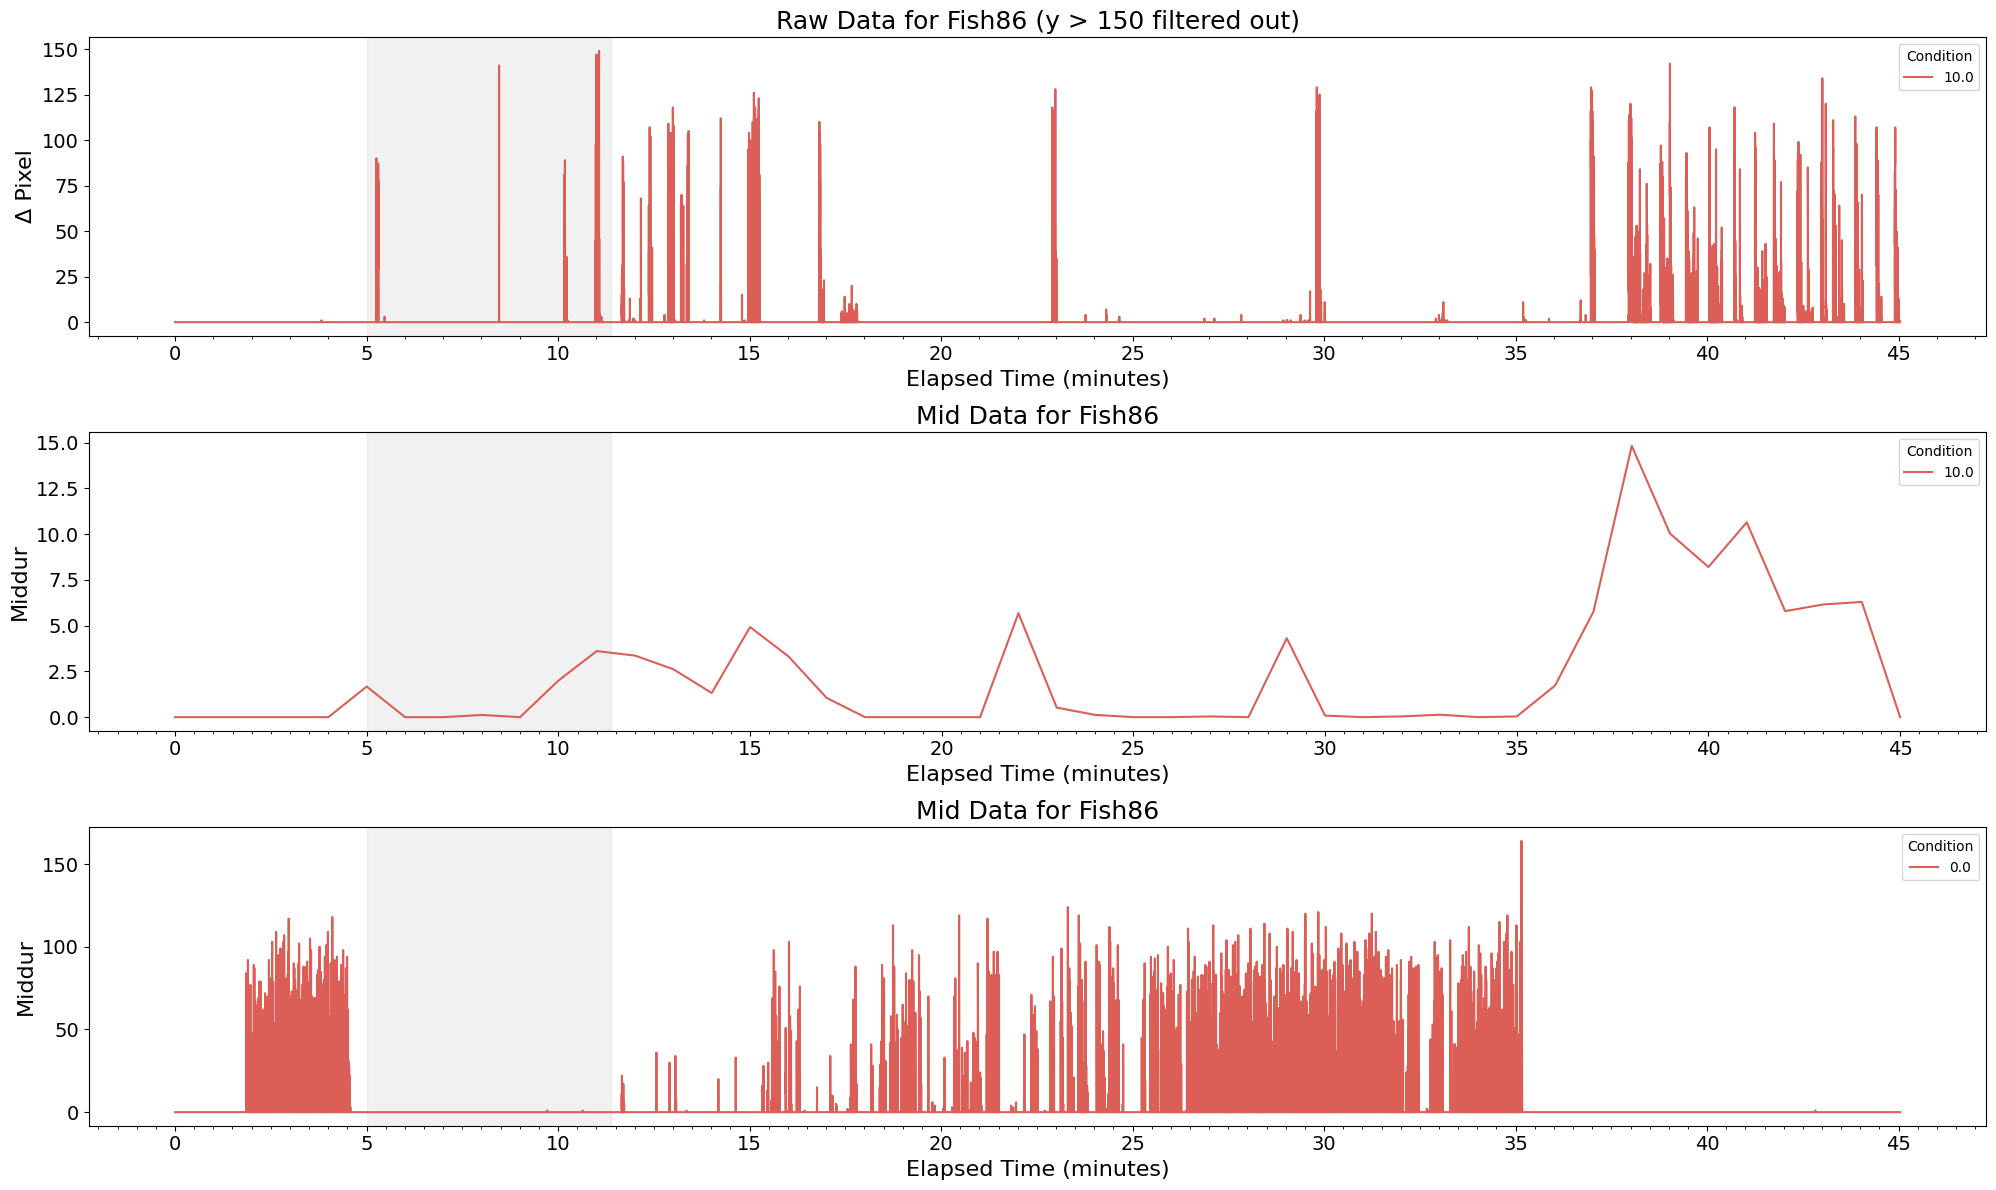

In [27]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

# Set the reference time (e.g., the earliest timestamp)
# Calculate elapsed time in seconds (or use .total_seconds() for float)
reference_time = df_raw['fullts'].min()
df_raw['elapsed_time'] = (df_raw['fullts'] - reference_time).dt.total_seconds()/60

# Set the reference time (e.g., the earliest timestamp)
# Calculate elapsed time in seconds (or use .total_seconds() for float)
reference_time_mid = df_mid['stdate_sttime'].min()
df_mid['elapsed_time'] = (df_mid['stdate_sttime'] - reference_time_mid).dt.total_seconds()/60

# exclude data1 more than 200


fish1     = df_raw[df_raw['location'] == 'C001']
# fish1     = df_raw[(df_raw['location'] == 'C001') & (df_raw['data1']<200)]
fish1_mid = df_mid[df_mid['location'] == 'C001']

# fish86     = df_raw[df_raw['location'] == 'C086']
fish86     = df_raw[(df_raw['location'] == 'C086') & (df_raw['data1']<150)]
fish86_mid = df_mid[df_mid['location'] == 'C086']


# Define the palette
palette = sns.color_palette("hls", n_colors=df_raw['condition'].nunique())

# Global font size settings
plt.rc('axes', titlesize=18)  # Title font size
plt.rc('axes', labelsize=16)  # X and Y label font size
plt.rc('xtick', labelsize=14)  # X-axis tick font size
plt.rc('ytick', labelsize=14)  # Y-axis tick font size

# Create a figure with two subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 12))  # 2 rows, 1 column

# First subplot for fish85
sns.lineplot(
    ax=axes[0],  # First subplot
    x='elapsed_time',
    y='data1',
    data=fish86,
    hue='condition',
    palette=palette
)
axes[0].axvspan(5, 11.37, color='lightgray', alpha=0.3)  # Add light gray shadow
axes[0].xaxis.set_major_locator(MultipleLocator(5))  # Ticks every minute
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))  # 5 minor ticks between major ticks
axes[0].set_title("Raw Data for Fish86 (y > 150 filtered out)")
axes[0].set_xlabel("Elapsed Time (minutes)")
axes[0].set_ylabel("Δ Pixel")
axes[0].legend(title="Condition", loc='best')

# Second subplot for fish85_mid
sns.lineplot(
    ax=axes[1],  # Second subplot
    x='elapsed_time',
    y='middur', 
    data=fish86_mid,
    hue='condition',
    palette=palette
)
axes[1].axvspan(5, 11.37, color='lightgray', alpha=0.3)  # Add light gray shadow
axes[1].xaxis.set_minor_locator(AutoMinorLocator(10))
axes[1].xaxis.set_major_locator(MultipleLocator(5))
axes[1].set_title("Mid Data for Fish86")
axes[1].set_xlabel("Elapsed Time (minutes)")
axes[1].set_ylabel("Middur")
axes[1].legend(title="Condition", loc='best')

# Third subplot for fish1
sns.lineplot(
    ax=axes[2],  # Second subplot
    x='elapsed_time',
    y='data1', 
    data=fish1,
    hue='condition',
    palette=palette
)
axes[2].axvspan(5, 11.37, color='lightgray', alpha=0.3)  # Add light gray shadow
axes[2].xaxis.set_minor_locator(AutoMinorLocator(10))
axes[2].xaxis.set_major_locator(MultipleLocator(5))
axes[2].set_title("Mid Data for Fish86")
axes[2].set_xlabel("Elapsed Time (minutes)")
axes[2].set_ylabel("Middur")
axes[2].legend(title="Condition", loc='best')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_5799/1117726293.py:43: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(


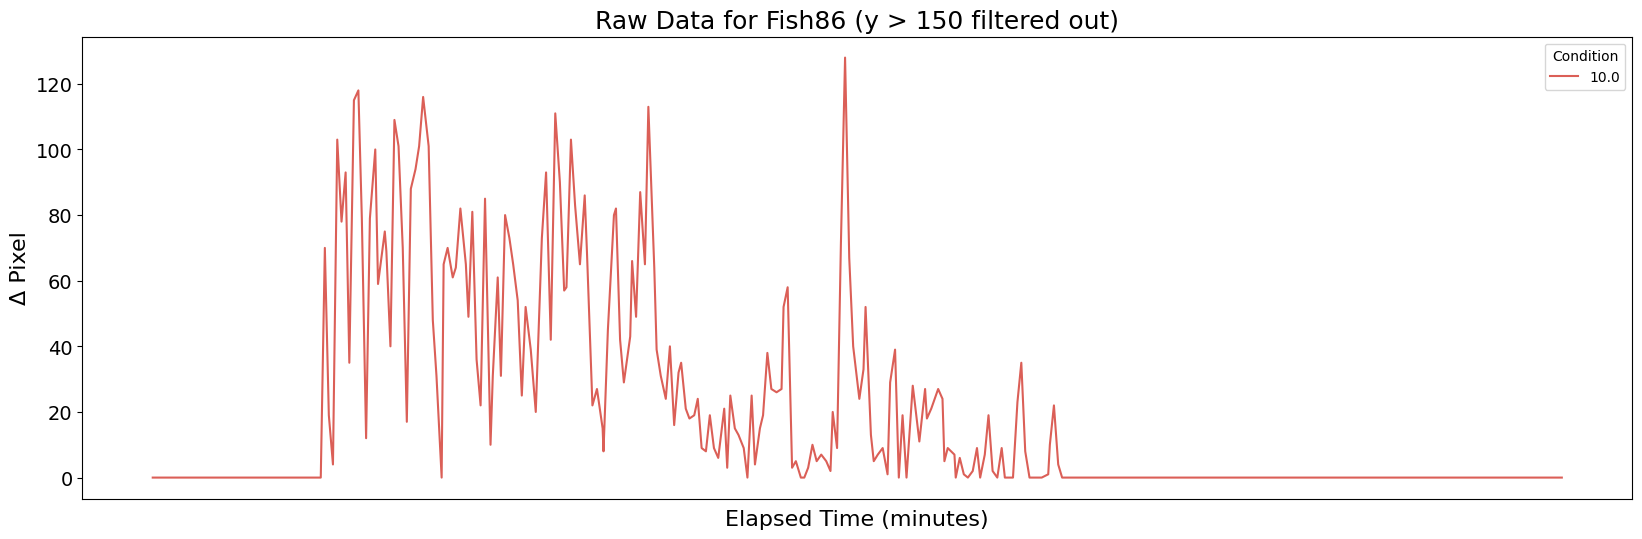

/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_5799/1117726293.py:72: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(


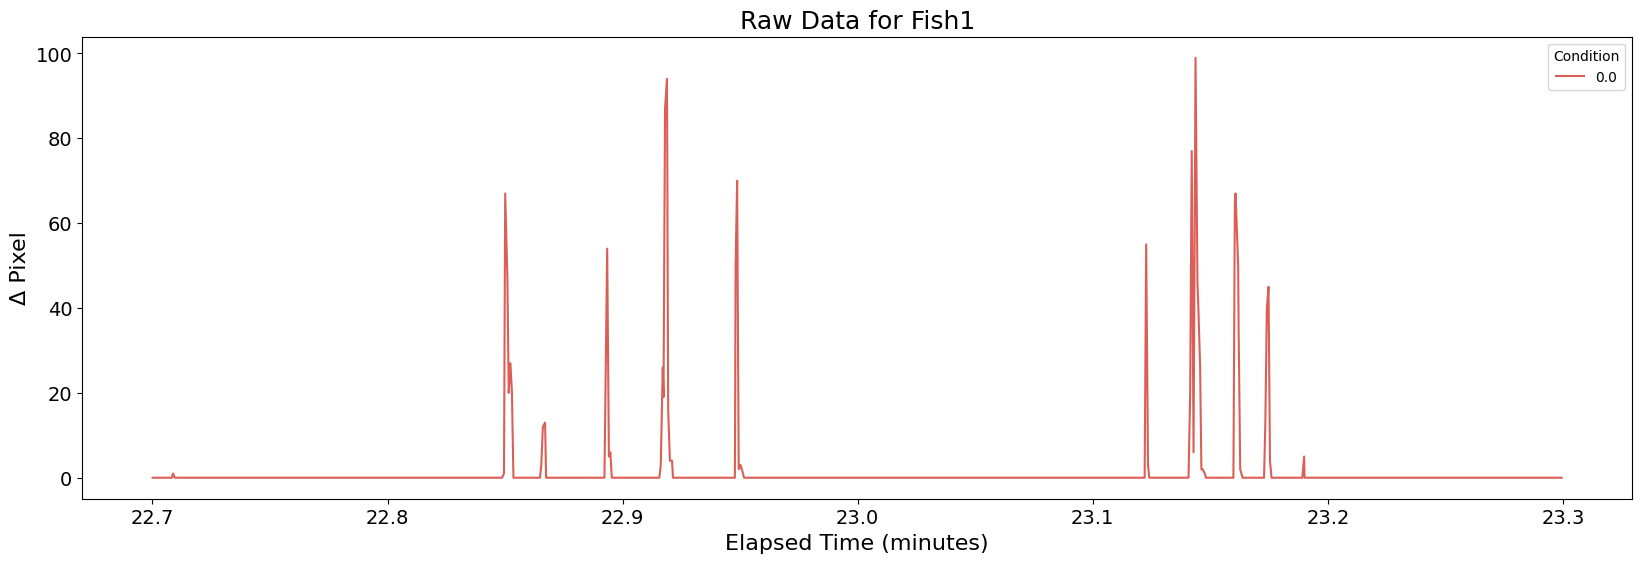

In [39]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

# Set the reference time (e.g., the earliest timestamp)
# Calculate elapsed time in seconds (or use .total_seconds() for float)
reference_time = df_raw['fullts'].min()
df_raw['elapsed_time'] = (df_raw['fullts'] - reference_time).dt.total_seconds()/60

# df_raw_22_24 = df_raw[(df_raw['elapsed_time'] >22) & (df_raw['elapsed_time'] <25) ]

# Set the reference time (e.g., the earliest timestamp)
# Calculate elapsed time in seconds (or use .total_seconds() for float)
reference_time_mid = df_mid['stdate_sttime'].min()
df_mid['elapsed_time'] = (df_mid['stdate_sttime'] - reference_time_mid).dt.total_seconds()/60

# df_mid_22_24 = df_mid[(df_mid['elapsed_time'] >22) & (df_mid['elapsed_time'] <25) ]

# exclude data1 more than 200


fish1     = df_raw[(df_raw['location'] == 'C001') & (df_raw['elapsed_time'] >22.7) & (df_raw['elapsed_time'] <23.3)]
# fish1     = df_raw[(df_raw['location'] == 'C001') & (df_raw['data1']<200)]
fish1_mid = df_mid[df_mid['location'] == 'C001']

# fish86     = df_raw[df_raw['location'] == 'C086']
fish86     = df_raw[(df_raw['location'] == 'C086') & (df_raw['data1']<150) & (df_raw['elapsed_time'] >22.87) & (df_raw['elapsed_time'] <23.1)]
fish86_mid = df_mid[df_mid['location'] == 'C086']


# Define the palette
palette = sns.color_palette("hls", n_colors=df_raw['condition'].nunique())

# Global font size settings
plt.rc('axes', titlesize=18)  # Title font size
plt.rc('axes', labelsize=16)  # X and Y label font size
plt.rc('xtick', labelsize=14)  # X-axis tick font size
plt.rc('ytick', labelsize=14)  # Y-axis tick font size

# Create the figure
plt.figure(figsize=(20, 6))  # Single plot

# Plot fish86 data
sns.lineplot(
    x='elapsed_time',
    y='data1',
    data=fish86,
    hue='condition',
    palette=palette
)

# Add light gray shaded region
# plt.axvspan(5, 11.37, color='lightgray', alpha=0.3)

# Set axis ticks and labels
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
plt.title("Raw Data for Fish86 (y > 150 filtered out)")
plt.xlabel("Elapsed Time (minutes)")
plt.ylabel("Δ Pixel")

# Add legend
plt.legend(title="Condition", loc='best')

# Show the plot
plt.show()


# Create the figure
plt.figure(figsize=(20, 6))  # Single plot

# Plot fish86 data
sns.lineplot(
    x='elapsed_time',
    y='data1',
    data=fish1,
    hue='condition',
    palette=palette
)

# Add light gray shaded region
# plt.axvspan(5, 11.37, color='lightgray', alpha=0.3)

# Set axis ticks and labels
# plt.gca().xaxis.set_major_locator(MultipleLocator(5))
# plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
plt.title("Raw Data for Fish1")
plt.xlabel("Elapsed Time (minutes)")
plt.ylabel("Δ Pixel")

# Add legend
plt.legend(title="Condition", loc='best')

# Show the plot
plt.show()

/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_13098/788080987.py:35: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_13098/788080987.py:48: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_13098/788080987.py:63: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_13098/788080987.py:77: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.lineplot(


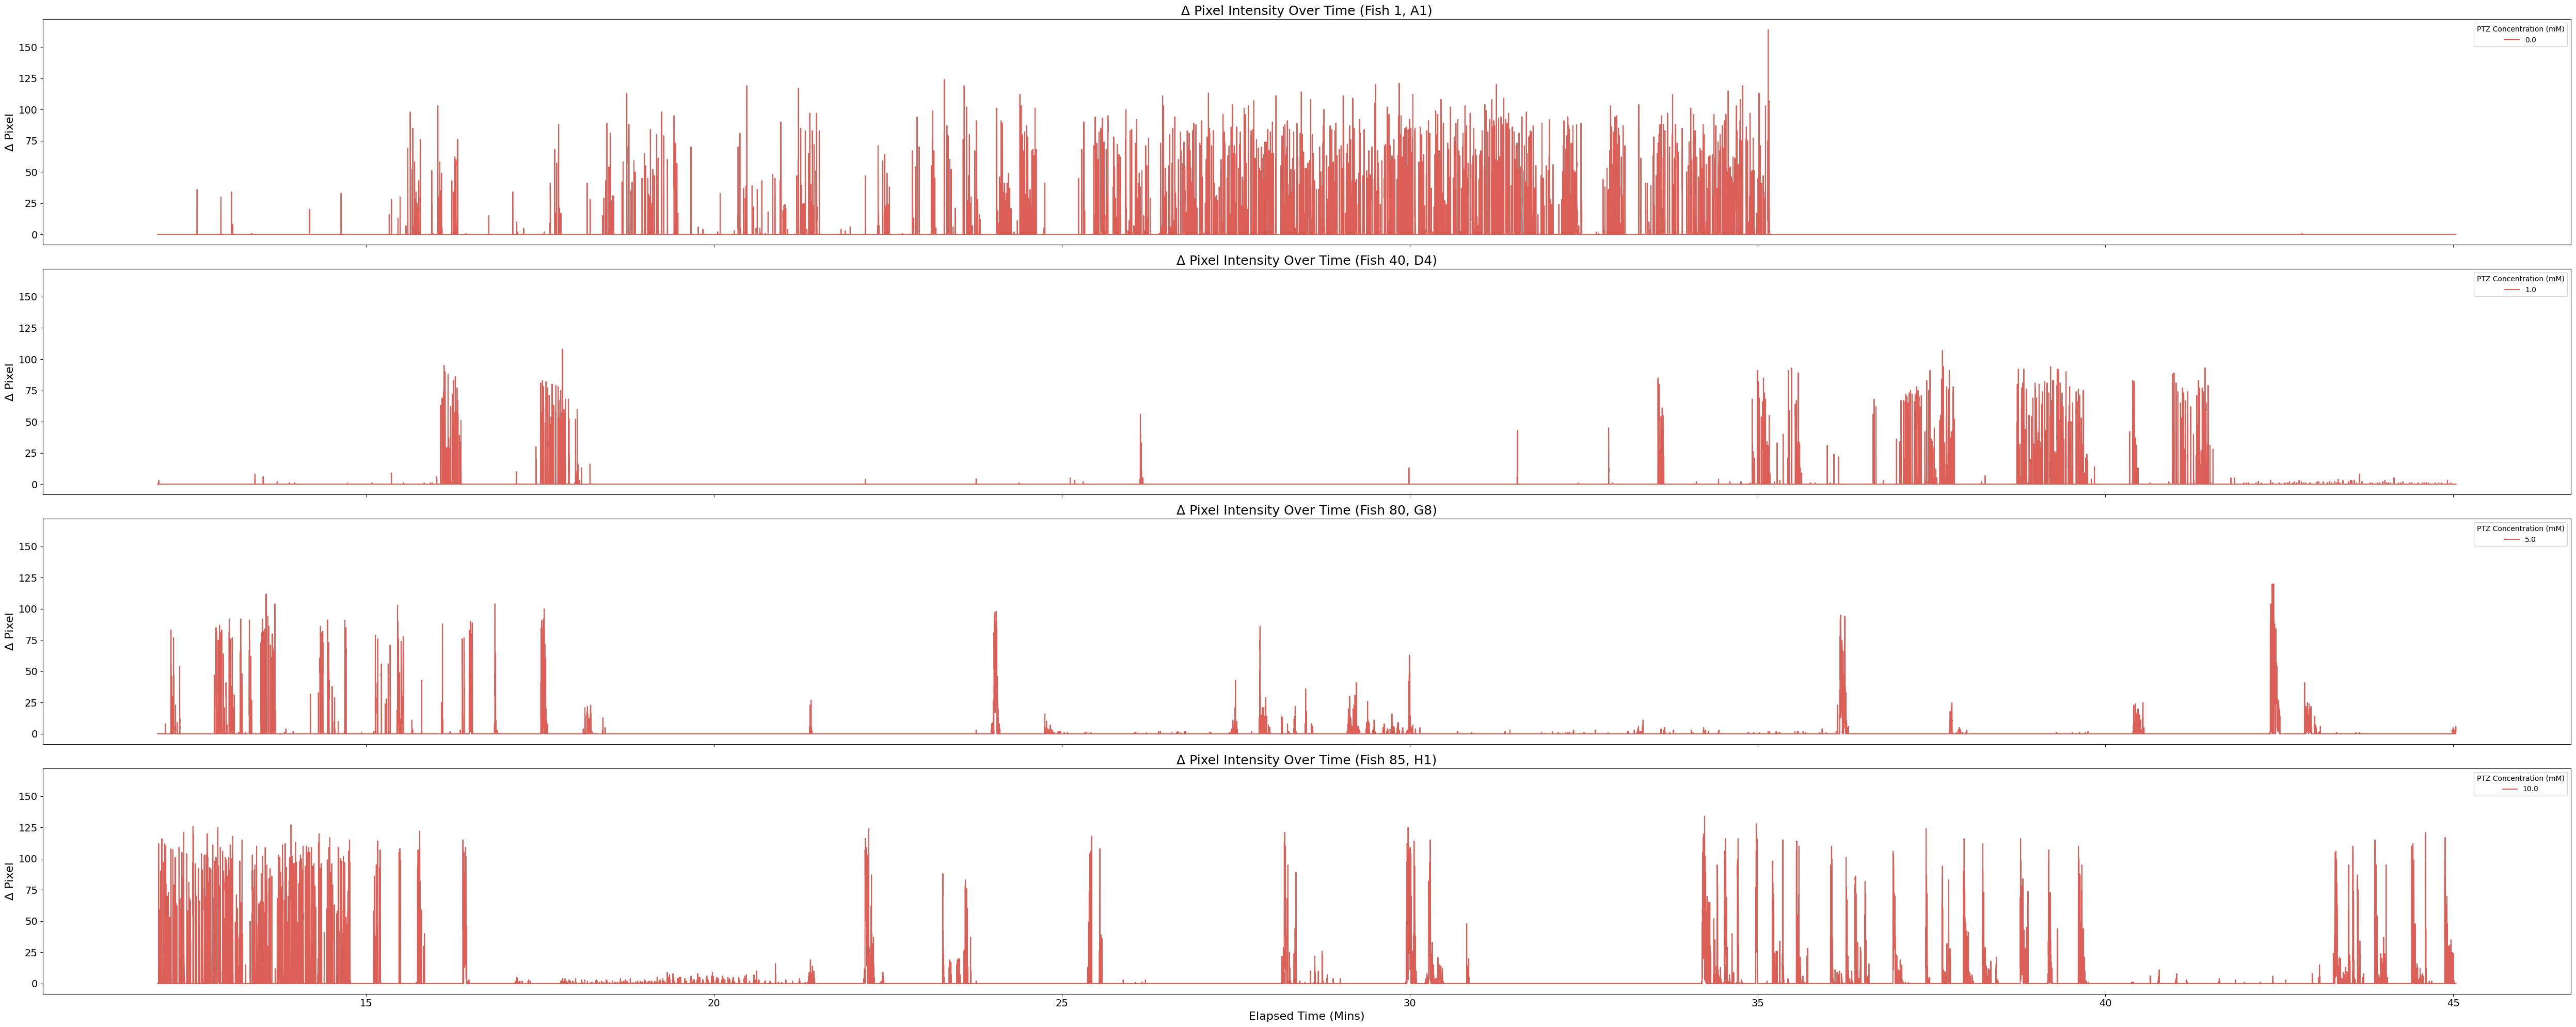

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# aggregated_df = df.groupby(['condition','genotype','fullts','location','well'])['data1'].sum().reset_index()
# print(aggregated_df, aggregated_df.describe())
# aggregated_df['data1'].unique()


# fish1  = aggregated_df[aggregated_df['location']=='C001'] #A1
# fish40 = aggregated_df[aggregated_df['location']=='C040'] #D4
# fish80 = aggregated_df[aggregated_df['location']=='C080'] #G6
# fish85 = aggregated_df[aggregated_df['location']=='C085'] #H1

# Trim rows where elapsed time is less than 12 minutes
filtered_df = df[df['elapsed_time'] >= 12]

fish1  = filtered_df[filtered_df['location']=='C001'] #A1
fish40 = filtered_df[filtered_df['location']=='C040'] #D4
fish80 = filtered_df[filtered_df['location']=='C080'] #G6
fish85 = filtered_df[filtered_df['location']=='C085'] #H1

x = 'elapsed_time'
y = 'data1'


# Create a shared figure and axes
fig, ax = plt.subplots(4, 1, figsize=(50, 20), sharey=True, sharex=True)

# Define the palette
palette = sns.color_palette("hls", n_colors=df['condition'].nunique())
   
# Plot the first dataset
sns.lineplot(
    ax=ax[0],
    x=x,
    y=y,
    data=fish1,
    hue="condition",
    palette=palette
)
ax[0].set_title("Δ Pixel Intensity Over Time (Fish 1, A1)")
ax[0].set_ylabel("Δ Pixel")
ax[0].legend(title="PTZ Concentration (mM)")

# Plot the second dataset
sns.lineplot(
    ax=ax[1],
    x=x,
    y=y,
    data=fish40,
    hue="condition",
    palette=palette
)

ax[1].set_title("Δ Pixel Intensity Over Time (Fish 40, D4)")
ax[1].set_xlabel("Time (Mins)")
ax[1].set_ylabel("Δ Pixel")
ax[1].legend(title="PTZ Concentration (mM)")

# Plot the third dataset
sns.lineplot(
    ax=ax[2],
    x=x,
    y=y,
    data=fish80,
    hue="condition",
    palette=palette
)
ax[2].set_title("Δ Pixel Intensity Over Time (Fish 80, G8)")
ax[2].set_xlabel("Day and Time ()")
ax[2].set_ylabel("Δ Pixel")
ax[2].legend(title="PTZ Concentration (mM)")

# Plot the third dataset
sns.lineplot(
    ax=ax[3],
    x=x,
    y=y,
    data=fish85,
    hue="condition",
    palette=palette
)
ax[3].set_title("Δ Pixel Intensity Over Time (Fish 85, H1)")
ax[3].set_xlabel("Elapsed Time (Mins)")
ax[3].set_ylabel("Δ Pixel")
ax[3].legend(title="PTZ Concentration (mM)")

# Adjust layout
plt.tight_layout()
plt.show()

In [72]:
filtered_df


,fullts,zhrs,exsecs,abstime,time,type,location,data1,plate,well,box,genotype,condition,elapsed_time
1722816,2024-11-07 16:37:58.041987,7.632789,720.041987,1083080126,720041987,101,C001,0.0,1,A1,16,HOM,0.0,12.000030
1722817,2024-11-07 16:37:58.041987,7.632789,720.041987,1083080126,720041987,101,C002,0.0,1,A2,16,HET,0.0,12.000030
1722818,2024-11-07 16:37:58.041987,7.632789,720.041987,1083080126,720041987,101,C003,0.0,1,A3,16,HOM,0.0,12.000030
1722819,2024-11-07 16:37:58.041987,7.632789,720.041987,1083080126,720041987,101,C004,0.0,1,A4,16,HOM,0.0,12.000030
1722820,2024-11-07 16:37:58.041987,7.632789,720.041987,1083080126,720041987,101,C005,0.0,1,A5,16,WT,0.0,12.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451578,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C091,11.0,1,H7,16,WT,10.0,45.038789
6451579,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C092,0.0,1,H8,16,HET,10.0,45.038789
6451580,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C093,0.0,1,H9,16,HET,10.0,45.038789
6451581,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C094,0.0,1,H10,16,WT,10.0,45.038789


In [44]:
palette = sns.color_palette("hls", n_colors=df['condition'].nunique())
sns.relplot(
    x="fullts",
    y="data1",
    data=df,
    kind="line",
    hue="condition",
    aspect=3,
    palette=palette
).set_axis_labels("Time (Seconds)", "Δ Pixel")
plt.title("Aggregated Activity Over Time (1-minute bins)")
plt.show()

NameError: name 'df' is not defined

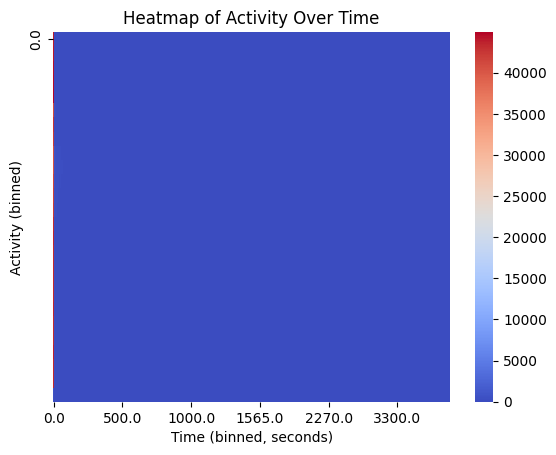

In [19]:
# Create bins for a heatmap
heatmap_df = df.copy()
heatmap_df['time_bin'] = (df['exsecs'] // 60) * 60
heatmap_df['activity_bin'] = (df['data1'] // 5) * 5  # Adjust bin size as needed

# Group and count
heatmap_data = heatmap_df.groupby(['time_bin', 'activity_bin']).size().unstack(fill_value=0)

# Plot heatmap
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    cbar=True,
    xticklabels=100,  # Adjust label frequency
    yticklabels=50
)
plt.xlabel("Time (binned, seconds)")
plt.ylabel("Activity (binned)")
plt.title("Heatmap of Activity Over Time")
plt.show()

In [2]:
df_raw


,fullts,zhrs,exsecs,abstime,time,type,location,data1,plate,well,box,genotype,condition
0,2024-11-07 16:25:58.040191,7.432789,0.040191,363078330,40191,101,C001,0.0,1,A1,16,HOM,0.0
1,2024-11-07 16:25:58.040191,7.432789,0.040191,363078330,40191,101,C002,0.0,1,A2,16,HET,0.0
2,2024-11-07 16:25:58.040191,7.432789,0.040191,363078330,40191,101,C003,0.0,1,A3,16,HOM,0.0
3,2024-11-07 16:25:58.040191,7.432789,0.040191,363078330,40191,101,C004,0.0,1,A4,16,HOM,0.0
4,2024-11-07 16:25:58.040191,7.432789,0.040191,363078330,40191,101,C005,0.0,1,A5,16,WT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451578,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C091,11.0,1,H7,16,WT,10.0
6451579,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C092,0.0,1,H8,16,HET,10.0
6451580,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C093,0.0,1,H9,16,HET,10.0
6451581,2024-11-07 17:11:00.367560,8.183435,2702.367560,3065405699,2702367560,101,C094,0.0,1,H10,16,WT,10.0
